# U.S. Oil and Gas Production Analysis

Analysing the [Kaggle Dataset](https://www.kaggle.com/djzurawski/us-oil-and-gas-production-june-2008-to-june-2018) with information about Oil and Gas production in the US from June 2008 to June 2018.

In [7]:
import numpy as np
import pandas as pd
import matplotlib

---

Let's load the Gas production:

In [19]:
file = "data/U.S._natural_gas_production.csv"
gas_df = pd.read_csv(file, decimal=",")
gas_df.head(3)

,Month,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
0,2008-06-01,70626,8875,1196,1024,2995,7339,6839,670,1198,540,21446,5241,224,243,3975,323,3989,3576,932
1,2008-07-01,71137,8375,1256,1034,3150,7468,6940,674,1200,512,21547,5256,220,243,4179,324,4008,3834,919
2,2008-08-01,70760,8739,1313,1033,3092,6868,6835,678,1277,529,21777,4896,220,249,4092,327,3896,4056,881


In [21]:
gas_df.shape

gas_df.columns

gas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Month                             121 non-null    object
 1   U.S.                              121 non-null    int64 
 2   Alaska                            121 non-null    int64 
 3   Arkansas                          121 non-null    int64 
 4   Kansas                            121 non-null    int64 
 5   Other States                      121 non-null    int64 
 6   Federal Offshore--Gulf of Mexico  121 non-null    int64 
 7   Wyoming                           121 non-null    int64 
 8   West Virginia                     121 non-null    int64 
 9   Utah                              121 non-null    int64 
 10  Pennsylvania                      121 non-null    int64 
 11  Texas                             121 non-null    int64 
 12  Oklahoma              

In [25]:
gas_df['Month']=pd.to_datetime(gas_df['Month'], format='%Y-%m-%d')

### Check your code

In [26]:
month_type = gas_df['Month'].dtype

In [29]:
from nbresult import ChallengeResult

result = ChallengeResult('date',
    month_type=month_type, 
)
result.write()

In [182]:
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /Users/humbert/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/humbert/code/HumbertMonnot/data-challenges/02-Data-Toolkit/01-Data-Analysis/03-US-Oil-and-Gas-Production
plugins: anyio-3.4.0, dash-2.0.0
collecting ... collected 2 items

tests/test_merged_dataframes.py::TestMergedDataframes::test_merged_df_has_the_right_shape PASSED [ 50%]
tests/test_merged_dataframes.py::TestMergedDataframes::test_yearly_oil_value_2009 PASSED [100%]

============================== 2 passed in 0.09s ===============================


💯 You can commit your code:

git add tests/merged_dataframes.pickle

git commit -m 'Completed merged_dataframes step'

git push origin master


In [35]:
gas_df['Month'].dt.year.tail()

116    2
117    3
118    4
119    5
120    6
Name: Month, dtype: int64

---

## Yearly Gas production

In [65]:
month = gas_df.groupby(gas_df['Month'].dt.year)
yearly_gas_df = month.sum()
yearly_gas_df

,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
Month,,,,,,,,,,,,,,,,,,,
2008,489473,64732,9395,7229,21678,39112,48393,4709,8726,3759,151483,36206,1617,1773,28518,2262,26289,27351,6240
2009,856876,108986,22353,11689,36078,80346,83413,8692,14782,9009,251694,62535,2919,3040,46867,3463,51221,49716,10071
2010,881622,105219,30475,10708,37542,74309,82687,8718,14361,18771,249632,60074,2568,3741,44101,3068,72873,52259,10521
2011,936163,104154,35384,10191,38187,60213,78095,12948,15170,43014,260747,62075,2592,5155,42315,2615,99905,54215,9181
2012,968632,103856,37571,9714,37045,50102,72988,17694,16079,73950,266989,66337,2772,8473,41846,2197,96895,56037,8092
2013,970617,105776,37466,9613,22657,43647,67338,24363,15482,107076,272844,65524,5442,11362,41010,2078,77873,52769,8296
2014,1032439,104298,36917,9415,20761,41937,65709,35055,14946,139932,284598,76643,16803,15214,41631,1947,64746,54021,7861
2015,1082158,104447,33221,9349,20102,42979,65615,43236,13717,158236,289330,82166,33069,19211,42638,1916,59621,55521,7786
2016,1070085,105900,26999,7984,18722,39990,60613,45077,11958,174225,266713,80932,47199,19964,42120,1710,57459,55791,6723


   ### Check your code

In [50]:
index_year = yearly_gas_df.index[0]
yearly_gas_shape = yearly_gas_df.shape
us_total = yearly_gas_df.iloc[0,0]

In [183]:
from nbresult import ChallengeResult

result = ChallengeResult('full_gas',
    index_year=index_year,
    yearly_gas_shape=yearly_gas_shape,
    us_total=us_total
)
result.write()

print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /Users/humbert/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/humbert/code/HumbertMonnot/data-challenges/02-Data-Toolkit/01-Data-Analysis/03-US-Oil-and-Gas-Production
plugins: anyio-3.4.0, dash-2.0.0
collecting ... collected 3 items

tests/test_full_gas.py::TestFullGas::test_df_has_the_right_index PASSED  [ 33%]
tests/test_full_gas.py::TestFullGas::test_df_has_the_right_shape PASSED  [ 66%]
tests/test_full_gas.py::TestFullGas::test_df_has_the_right_values PASSED [100%]

============================== 3 passed in 0.09s ===============================


💯 You can commit your code:

git add tests/full_gas.pickle

git commit -m 'Completed full_gas step'

git push origin master


<AxesSubplot:xlabel='Month'>

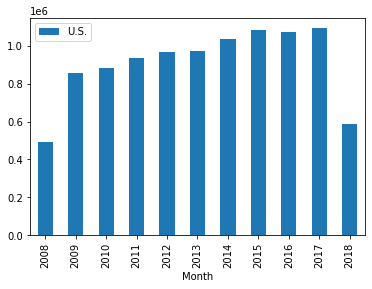

In [64]:
data = yearly_gas_df.filter(like = "U.S.")
data.plot(kind = "bar")

In [112]:
filtered_yearly_gas_df = yearly_gas_df[gas_df.groupby(gas_df['Month'].dt.year).count() == 12].dropna()
filtered_yearly_gas_df

,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
Month,,,,,,,,,,,,,,,,,,,
2009,856876.0,108986.0,22353.0,11689.0,36078.0,80346.0,83413.0,8692.0,14782.0,9009.0,251694.0,62535.0,2919.0,3040.0,46867.0,3463.0,51221.0,49716.0,10071.0
2010,881622.0,105219.0,30475.0,10708.0,37542.0,74309.0,82687.0,8718.0,14361.0,18771.0,249632.0,60074.0,2568.0,3741.0,44101.0,3068.0,72873.0,52259.0,10521.0
2011,936163.0,104154.0,35384.0,10191.0,38187.0,60213.0,78095.0,12948.0,15170.0,43014.0,260747.0,62075.0,2592.0,5155.0,42315.0,2615.0,99905.0,54215.0,9181.0
2012,968632.0,103856.0,37571.0,9714.0,37045.0,50102.0,72988.0,17694.0,16079.0,73950.0,266989.0,66337.0,2772.0,8473.0,41846.0,2197.0,96895.0,56037.0,8092.0
2013,970617.0,105776.0,37466.0,9613.0,22657.0,43647.0,67338.0,24363.0,15482.0,107076.0,272844.0,65524.0,5442.0,11362.0,41010.0,2078.0,77873.0,52769.0,8296.0
2014,1032439.0,104298.0,36917.0,9415.0,20761.0,41937.0,65709.0,35055.0,14946.0,139932.0,284598.0,76643.0,16803.0,15214.0,41631.0,1947.0,64746.0,54021.0,7861.0
2015,1082158.0,104447.0,33221.0,9349.0,20102.0,42979.0,65615.0,43236.0,13717.0,158236.0,289330.0,82166.0,33069.0,19211.0,42638.0,1916.0,59621.0,55521.0,7786.0
2016,1070085.0,105900.0,26999.0,7984.0,18722.0,39990.0,60613.0,45077.0,11958.0,174225.0,266713.0,80932.0,47199.0,19964.0,42120.0,1710.0,57459.0,55791.0,6723.0
2017,1090730.0,106969.0,23050.0,7247.0,17069.0,35592.0,56410.0,52609.0,10312.0,179644.0,260314.0,82616.0,58702.0,22577.0,43910.0,1577.0,69947.0,55546.0,6642.0


### Check your code


In [184]:
from nbresult import ChallengeResult

result = ChallengeResult('filtered_gas',
    yearly_gas=filtered_yearly_gas_df.shape
)
result.write()

print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /Users/humbert/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/humbert/code/HumbertMonnot/data-challenges/02-Data-Toolkit/01-Data-Analysis/03-US-Oil-and-Gas-Production
plugins: anyio-3.4.0, dash-2.0.0
collecting ... collected 1 item

tests/test_filtered_gas.py::TestFilteredGas::test_yearly_gas_production_df_has_the_right_shape PASSED [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/filtered_gas.pickle

git commit -m 'Completed filtered_gas step'

git push origin master


## State production

Let's have a look at the yearly production of some specific states

In [114]:
filtered_yearly_gas_df.columns[1:].sort_values()

Index(['Alaska', 'Arkansas', 'California', 'Colorado',
       'Federal Offshore--Gulf of Mexico', 'Kansas', 'Louisiana', 'Montana',
       'New Mexico', 'North Dakota', 'Ohio', 'Oklahoma', 'Other States',
       'Pennsylvania', 'Texas', 'Utah', 'West Virginia', 'Wyoming'],
      dtype='object')

<AxesSubplot:xlabel='Month'>

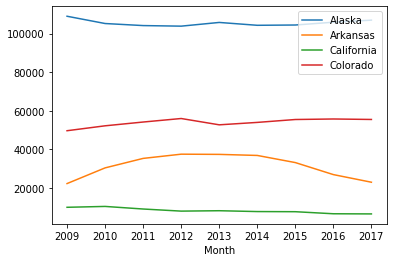

In [120]:
filtered_yearly_gas_df[['Alaska', 'Arkansas', 'California', 'Colorado']].plot()

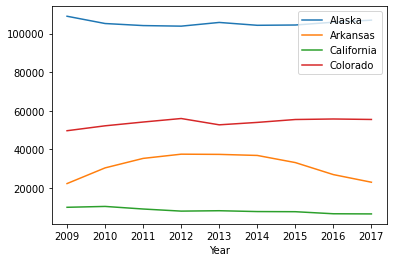

In [119]:
plot = filtered_yearly_gas_df.filter(items=['Alaska', 'Arkansas', 'California', 'Colorado']).plot()
plot.set_xlabel("Year");

---

## Comparing with Crude Oil Production

In [122]:
file = "data/U.S._crude_oil_production.csv"
oil_df = pd.read_csv(file, decimal=",")
oil_df.head(3)

,Month,U.S. Crude Oil,Alabama,Alaska,Arkansas,Arizona,California,Colorado,Federal Offshore Gulf of Mexico Crude Oil,Federal Offshore Pacific Crude Oil,...,Ohio,Oklahoma,Pennsylvania,South Dakota,Wyoming,West Virginia,Virginia,Utah,Texas,Tennessee
0,2008-06-01,5138,21,655,17,0,583,82,1326,67,...,14,186,8,5,144,6,0,60,1097,1
1,2008-07-01,5177,21,640,17,0,586,81,1372,61,...,14,184,8,5,145,5,0,61,1111,1
2,2008-08-01,5003,21,544,17,0,588,82,1272,70,...,14,188,8,5,145,6,0,62,1110,1


In [123]:
oil_df['Month']=pd.to_datetime(oil_df['Month'], format='%Y-%m-%d')

---

## Yearly Oil production

In [129]:
yearly_oil_df = oil_df.groupby(oil_df['Month'].dt.year).sum()
yearly_oil_df

,U.S. Crude Oil,Alabama,Alaska,Arkansas,Arizona,California,Colorado,Federal Offshore Gulf of Mexico Crude Oil,Federal Offshore Pacific Crude Oil,Florida,...,Ohio,Oklahoma,Pennsylvania,South Dakota,Wyoming,West Virginia,Virginia,Utah,Texas,Tennessee
Month,,,,,,,,,,,,,,,,,,,,,
2008,34211,149,4666,118,0,4095,589,7302,465,37,...,98,1286,56,35,1013,39,0,438,7773,7
2009,64180,236,7749,189,0,6815,998,18727,734,24,...,156,2144,96,55,1695,48,0,757,13132,12
2010,65741,234,7199,189,0,6588,1086,18640,713,56,...,156,2239,108,53,1771,59,0,809,14026,12
2011,67829,275,6742,195,0,6449,1295,15805,652,67,...,156,2534,114,53,1795,72,0,864,17393,12
2012,78007,312,6310,214,0,6465,1626,15189,580,71,...,168,3095,144,60,1900,85,0,991,23742,12
2013,89585,342,6182,218,0,6540,2175,15068,610,72,...,264,3786,174,60,2088,237,0,1152,30475,12
2014,105064,323,5958,224,0,6729,3139,16761,608,73,...,495,4605,222,60,2501,340,0,1346,38049,12
2015,113179,318,5796,205,0,6619,4036,18174,378,72,...,876,5484,232,53,2842,380,0,1222,41335,12
2016,105970,266,5874,183,0,6101,3820,19177,201,63,...,705,5102,207,47,2380,251,0,1001,38140,12


In [133]:
to_plot = yearly_oil_df.filter(items = ['U.S. Crude Oil'])
to_plot.plot()

TypeError: no numeric data to plot

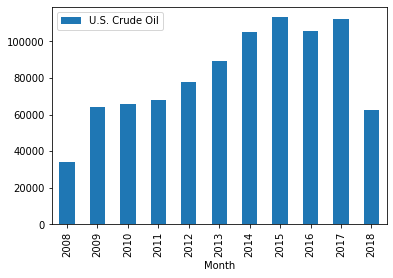

In [147]:
yearly_oil_df.rename(columns ={'U.S. Crude Oil ': 'U.S. Crude Oil'}, inplace=True )
yearly_oil_df.filter(items=['U.S. Crude Oil']).plot(kind='bar');

In [149]:
year_filter = np.logical_and(yearly_oil_df.index>2008,yearly_oil_df.index<2018)
filtered_yearly_oil_df = yearly_oil_df[year_filter]

### Check your code

In [185]:
from nbresult import ChallengeResult

result = ChallengeResult('oil',
    filtered_oil_shape=filtered_yearly_oil_df.shape,
    filtered_oil_index_year=filtered_yearly_oil_df.index[0],
    us_total=filtered_yearly_oil_df.iloc[0,0]
)
result.write()

print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /Users/humbert/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/humbert/code/HumbertMonnot/data-challenges/02-Data-Toolkit/01-Data-Analysis/03-US-Oil-and-Gas-Production
plugins: anyio-3.4.0, dash-2.0.0
collecting ... collected 3 items

tests/test_oil.py::TestOil::test_df_has_the_right_index PASSED           [ 33%]
tests/test_oil.py::TestOil::test_df_has_the_right_shape PASSED           [ 66%]
tests/test_oil.py::TestOil::test_df_has_the_right_values PASSED          [100%]

============================== 3 passed in 0.08s ===============================


💯 You can commit your code:

git add tests/oil.pickle

git commit -m 'Completed oil step'

git push origin master


## Merging Oil and Gas Production

In [176]:
total_gas = filtered_yearly_gas_df.filter(items =['U.S.'])
total_oil = filtered_yearly_oil_df.filter(items =['U.S. Crude Oil'])

In [177]:
total_gas.rename(columns ={'U.S.':'Gas'}, inplace=True)

In [178]:
total_oil.rename(columns ={'U.S. Crude Oil':'Crude Oil'}, inplace=True)

In [179]:
merged_df = pd.concat([total_oil, total_gas], axis = 1)
merged_df

,Crude Oil,Gas
Month,,
2009,64180,856876.0
2010,65741,881622.0
2011,67829,936163.0
2012,78007,968632.0
2013,89585,970617.0
2014,105064,1032439.0
2015,113179,1082158.0
2016,105970,1070085.0
2017,112205,1090730.0


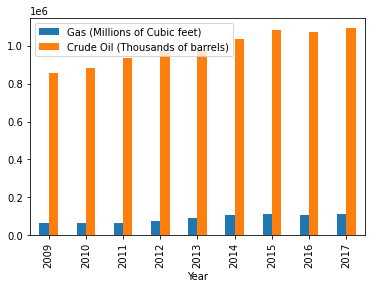

In [180]:
plot = merged_df.plot(kind="bar")
plot.set_xlabel("Year")
plot.legend(['Gas (Millions of Cubic feet)', 'Crude Oil (Thousands of barrels)']);

### Check your code

In [181]:
from nbresult import ChallengeResult

result = ChallengeResult('merged_dataframes',
    merged_df_shape=merged_df.shape,
    yearly_oil_2009=merged_df.iloc[0]["Crude Oil"],
)
result.write()

print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /Users/humbert/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/humbert/code/HumbertMonnot/data-challenges/02-Data-Toolkit/01-Data-Analysis/03-US-Oil-and-Gas-Production
plugins: anyio-3.4.0, dash-2.0.0
collecting ... collected 2 items

tests/test_merged_dataframes.py::TestMergedDataframes::test_merged_df_has_the_right_shape PASSED [ 50%]
tests/test_merged_dataframes.py::TestMergedDataframes::test_yearly_oil_value_2009 PASSED [100%]

============================== 2 passed in 0.11s ===============================


💯 You can commit your code:

git add tests/merged_dataframes.pickle

git commit -m 'Completed merged_dataframes step'

git push origin master


In [186]:
from nbresult import ChallengeResult

result = ChallengeResult('filtered_gas',
    yearly_gas=filtered_yearly_gas_df.shape
)
result.write()

print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /Users/humbert/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/humbert/code/HumbertMonnot/data-challenges/02-Data-Toolkit/01-Data-Analysis/03-US-Oil-and-Gas-Production
plugins: anyio-3.4.0, dash-2.0.0
collecting ... collected 1 item

tests/test_filtered_gas.py::TestFilteredGas::test_yearly_gas_production_df_has_the_right_shape PASSED [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/filtered_gas.pickle

git commit -m 'Completed filtered_gas step'

git push origin master


In [190]:
from nbresult import ChallengeResult

result = ChallengeResult('gas',
    month_type=month_type,
    yearly_gas=filtered_yearly_gas_df.shape
)
result.write()

KeyError: 'Month'